# PART 1: Data Cleaning and Organization

## DESCRIPTION: This portion of the code is the Data Cleaning in order to set up the data for analysis.


In [45]:
# Import packages used in the notebook. 
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt


In [46]:
#Change working directory.
os.chdir('C:\\Users\\jday1\\Data Tools 1\\Project\\new folder')


In [47]:
#Import Raw FBI data and convert to Dataframe. Output '.csv' files for "possible" later use.
years = [2014,2015,2016,2017]

for year in years:
    print('Saving year ' + str(year) + ' as .csv for later use')
    if year == 2014:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_2014.csv"
        ht_offenses_clearing_2014_df = pd.read_excel("Table_2_Human_Trafficking_Offenses_and_Clearances_by_State_2014.xlsx")
        ht_offenses_clearing_2014_df.to_csv(file_name, sep='\t', encoding='utf-8')
    elif year == 2015:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_" + str(year) + ".csv"
        ht_offenses_clearing_2015_df = pd.read_excel("table-1_Human_Trafficking_Offenses_and_Clearances_by_State_"+ str(year) + ".xls")
        ht_offenses_clearing_2015_df.to_csv(file_name, sep='\t', encoding='utf-8')
    elif year == 2016:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_" + str(year) + ".csv"
        ht_offenses_clearing_2016_df = pd.read_excel("table-1_Human_Trafficking_Offenses_and_Clearances_by_State_"+ str(year) + ".xls")
        ht_offenses_clearing_2016_df.to_csv(file_name, sep='\t', encoding='utf-8')
    elif year == 2017:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_" + str(year) + ".csv"
        ht_offenses_clearing_2017_df = pd.read_excel("table-1_Human_Trafficking_Offenses_and_Clearances_by_State_"+ str(year) + ".xls")
        ht_offenses_clearing_2017_df.to_csv(file_name, sep='\t', encoding='utf-8')


Saving year 2014 as .csv for later use
Saving year 2015 as .csv for later use
Saving year 2016 as .csv for later use
Saving year 2017 as .csv for later use


In [48]:
# Adding column names
column_Names = ["state", "commercial_sex_act_offense", "commercial_sex_act_cleared", "commercial_sex_act_cleared_under_18", "involuntary_servitude_offense", "involuntary_servitude_cleared", "involuntary_servitude_cleared_under_18","total_offenses", "total_cleared","total_under_18"]
ht_offenses_clearing_2014_df.columns = column_Names
ht_offenses_clearing_2015_df.columns = column_Names
ht_offenses_clearing_2016_df.columns = column_Names
ht_offenses_clearing_2017_df.columns = column_Names

In [49]:
#Cleaning the rows with NaNs. I did not use df.dropna() because I know the static rows that need to be dropped. 
ht_offenses_clearing_2014_df = ht_offenses_clearing_2014_df.drop([0, 1, 2, 3])
ht_offenses_clearing_2015_df = ht_offenses_clearing_2015_df.drop([0, 1, 2, 3])
ht_offenses_clearing_2016_df = ht_offenses_clearing_2016_df.drop([0, 1, 2, 3])
ht_offenses_clearing_2017_df = ht_offenses_clearing_2017_df.drop([0, 1, 2, 3,51])


In [50]:
# I want a single view of all the data. Thus I will combine the data eventually.
# so I am adding a year column to all dfs to note what year the data is from when combining dfs.
ht_offenses_clearing_2014_df['year'] = 2014
ht_offenses_clearing_2015_df['year'] = 2015
ht_offenses_clearing_2016_df['year'] = 2016
ht_offenses_clearing_2017_df['year'] = 2017

In [51]:
#Saving new dfs to csv created above
for year in years:
    print('Saving year ' + str(year))
    if year == 2014:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_2014.csv"
        ht_offenses_clearing_2014_df.to_csv(file_name)
    elif year == 2015:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_" + str(year) + ".csv"
        ht_offenses_clearing_2015_df.to_csv(file_name)
    elif year == 2016:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_" + str(year) + ".csv"
        ht_offenses_clearing_2016_df.to_csv(file_name)
    elif year == 2017:
        file_name="Human_Trafficking_Offenses_and_Clearances_by_State_" + str(year) + ".csv"
        ht_offenses_clearing_2017_df.to_csv(file_name)


Saving year 2014
Saving year 2015
Saving year 2016
Saving year 2017


In [52]:
#Combining the dfs for a single df view
frames = [ht_offenses_clearing_2014_df,ht_offenses_clearing_2015_df,ht_offenses_clearing_2016_df,ht_offenses_clearing_2017_df]
ht_offenses_clearing_4_years_df = pd.concat(frames)

file_name = "Human_Trafficking_Offenses_and_Clearances_by_State_2014_to_2017.csv"
ht_offenses_clearing_4_years_df.to_csv(file_name)


In [53]:
#Subset sex offense and involuntary servitude into separate dfs
comm_sex_offense_df = ht_offenses_clearing_4_years_df[["state","commercial_sex_act_offense","commercial_sex_act_cleared","commercial_sex_act_cleared_under_18","year"]]
comm_sex_offense_df = comm_sex_offense_df.drop(index = comm_sex_offense_df.index[[148]])
comm_sex_offense_df['offense'] = 'commercial sex act'

In [54]:
#Creat column that specified how many adult clearances there were given the opposite is child and that already has a column
comm_sex_offense_df2 = comm_sex_offense_df[['year','state','offense','commercial_sex_act_offense','commercial_sex_act_cleared','commercial_sex_act_cleared_under_18']]
comm_sex_offense_df2['commercial_sex_act_cleared_adults'] = comm_sex_offense_df["commercial_sex_act_cleared"] - comm_sex_offense_df["commercial_sex_act_cleared_under_18"]
del comm_sex_offense_df2['commercial_sex_act_cleared']

comm_sex_offense_df2.columns = ['year','state','offense','occurrence','juvenile','adult']
comm_sex_offense_df2

C:\Users\jday1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,state,offense,occurrence,juvenile,adult
4,2014,Alaska,commercial sex act,11,0,3
5,2014,Arizona,commercial sex act,15,0,8
6,2014,California,commercial sex act,0,0,0
7,2014,Colorado,commercial sex act,11,0,0
8,2014,Delaware,commercial sex act,0,0,0
...,...,...,...,...,...,...
45,2017,Texas,commercial sex act,193,4,78
46,2017,Utah,commercial sex act,1,0,0
48,2017,Washington,commercial sex act,29,0,6
49,2017,Wisconsin,commercial sex act,59,0,16


In [55]:
comm_sex_offense_df2['age'] = 'adult'
comm_sex_offense_df2['cleared'] = comm_sex_offense_df2['adult']

comm_sex_offense_temp = comm_sex_offense_df2.copy(deep=True)
comm_sex_offense_temp['age'] = 'juvenile'
comm_sex_offense_temp['cleared'] = comm_sex_offense_df2['juvenile']   

comm_sex_offense_df2 = pd.concat([comm_sex_offense_df2,comm_sex_offense_temp])
del comm_sex_offense_df2['adult']
del comm_sex_offense_df2['juvenile']


C:\Users\jday1\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jday1\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
invol_serv_df = ht_offenses_clearing_4_years_df[["year", "state", "involuntary_servitude_offense", "involuntary_servitude_cleared", "involuntary_servitude_cleared_under_18"]]
invol_serv_df = invol_serv_df.drop(index = invol_serv_df.index[[148]])
invol_serv_df['offense'] = 'involuntary servitude'

In [57]:
invol_serv_df['involuntary_servitude_cleared_adult'] = invol_serv_df['involuntary_servitude_cleared'] - invol_serv_df['involuntary_servitude_cleared_under_18']
del invol_serv_df['involuntary_servitude_cleared']

invol_serv_df = invol_serv_df[['year','state','offense','involuntary_servitude_offense','involuntary_servitude_cleared_adult','involuntary_servitude_cleared_under_18']]
invol_serv_df.columns = ['year','state','offense','occurrence','adult','juvenile']

In [58]:
invol_serv_df['age'] = 'adult'
invol_serv_df['cleared'] = invol_serv_df['adult']

invol_serv_temp = invol_serv_df.copy(deep=True)
invol_serv_temp['age'] = 'juvenile'
invol_serv_temp['cleared'] = invol_serv_df['juvenile']   

invol_serv_df = pd.concat([invol_serv_df,invol_serv_temp])
del invol_serv_df['adult']
del invol_serv_df['juvenile']

In [59]:
#Combine commercial and involuntary sex acts dataframes
ht_offenses_4_years_clean_df = pd.concat([comm_sex_offense_df2,invol_serv_df])

In [60]:
#Unique values in state column to look for any difference in naming convention
uniqueValues = ht_offenses_4_years_clean_df['state'].unique()
uniqueValues.sort()
print(uniqueValues)

['Alabama*' 'Alaska' 'Arizona' 'Arkansas' 'California' 'California*'
 'Colorado' 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Guam' 'Hawaii'
 'Idaho' 'Idaho*' 'Illinois' 'Indiana' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nebraska*' 'Nevada' 'New Hampshire'
 'New Mexico*' 'New York' 'New York*' 'North Carolina' 'North Carolina*'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas'
 'U. S. Virgin Islands' 'U.S. Virgin Islands' 'Utah' 'Vermont'
 'Washington' 'Wisconsin' 'Wyoming']


Based on the output from the uniqueValues variable one cell above. We can see that we need to clean the name of the states. For exmaple, the state of Alabama has an * at the end of the name and that is not correct. Also some states have more spaces in the name than necessary. We will address this below.


In [61]:
# Need add consistency/unify the way some "states" are spelled. 
ht_offenses_4_years_clean_df['state'] = ht_offenses_4_years_clean_df['state'].replace('U. S. Virgin Islands', 'U.S. Virgin Islands')
ht_offenses_4_years_clean_df['state'] = ht_offenses_4_years_clean_df['state'].str.replace('*', '')

Although the data is classified by State, the FBI also identifies cases by region and assigning a number for each region. Thus I will add both the region and a description to the data.

In [62]:
#Import the FBI state regions data
state_regions_df = pd.read_csv("state_regions.csv")

In [63]:
#Merge dataframes on state to fill in region and region_description data
ht_offenses_4_years_clean_df = pd.merge(ht_offenses_4_years_clean_df, state_regions_df, on = "state")
ht_offenses_4_years_clean_df.head()

,year,state,offense,occurrence,age,cleared,region,region_description
0,2014,Alaska,commercial sex act,11,adult,3,9,Southwest/Pacific
1,2015,Alaska,commercial sex act,10,adult,1,9,Southwest/Pacific
2,2016,Alaska,commercial sex act,11,adult,8,9,Southwest/Pacific
3,2017,Alaska,commercial sex act,2,adult,0,9,Southwest/Pacific
4,2014,Alaska,commercial sex act,11,juvenile,0,9,Southwest/Pacific


In [64]:
#Give year a numerical encoding for regression analysis later on
le = preprocessing.LabelEncoder()
ht_offenses_4_years_clean_df['year_data'] = le.fit_transform(ht_offenses_4_years_clean_df.year)
ht_offenses_4_years_clean_df.head()

,year,state,offense,occurrence,age,cleared,region,region_description,year_data
0,2014,Alaska,commercial sex act,11,adult,3,9,Southwest/Pacific,0
1,2015,Alaska,commercial sex act,10,adult,1,9,Southwest/Pacific,1
2,2016,Alaska,commercial sex act,11,adult,8,9,Southwest/Pacific,2
3,2017,Alaska,commercial sex act,2,adult,0,9,Southwest/Pacific,3
4,2014,Alaska,commercial sex act,11,juvenile,0,9,Southwest/Pacific,0


In [65]:
#Reorder columns for later analysis
ht_offenses_4_years_clean_df = ht_offenses_4_years_clean_df[['year_data', 'year', 'region', 'region_description', 'state', 'offense', 'occurrence', 'age', 'cleared']]

I located a csv file that had population data for the years required for analysis (2010-2018). This file was found on https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk for reference.

In [66]:
#Read in population data
population_df = pd.read_csv('Population_data.csv')
population_df.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
1,0100000US,NaN,United States,308745538,308758105,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434
2,0400000US01,1,Alabama,4779736,4780138,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
3,0400000US02,2,Alaska,710231,710249,713906,722038,730399,737045,736307,737547,741504,739786,737438
4,0400000US04,4,Arizona,6392017,6392288,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646


In [67]:
# Remove unnecessary columns and rows
del population_df['GEO.id']
del population_df['GEO.id2']
del population_df['rescen42010']
del population_df['resbase42010']
population_df = population_df.iloc[2:]
population_df.head()

,GEO.display-label,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
2,Alabama,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
3,Alaska,713906,722038,730399,737045,736307,737547,741504,739786,737438
4,Arizona,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
5,Arkansas,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
6,California,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [68]:
#Now we need to remove unnecesary row data after renaming columns
population_df = population_df.rename(columns={"GEO.display-label": "state", "respop72010": "2010","respop72011": "2011", "respop72012": "2012","respop72013": "2013","respop72014": "2014","respop72015": "2015","respop72016": "2016","respop72017": "2017","respop72018": "2018"})
population_df.head()

,state,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,Alabama,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
3,Alaska,713906,722038,730399,737045,736307,737547,741504,739786,737438
4,Arizona,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646
5,Arkansas,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825
6,California,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045


In [69]:
#Transpose data for analysis. Bring colums into rows using melt
population_gather_df = pd.melt(population_df, id_vars=['state'], value_vars=['2010', '2011','2012','2013','2014','2015','2016','2017','2018'],var_name='year')
population_gather_df['year']=population_gather_df['year'].astype(int)

In [70]:
#Write the dataframes for analysis later on.
file_name = "population_by_state_by_year_wide.csv"
population_df.to_csv(file_name)

file_name = "population_by_state_by_year_long.csv"
population_gather_df.to_csv(file_name)

Now we have both the human trafficking df and the population df. The next steps would be to put them together but to do that we need to add a column to the human trafficking df for population.

In [71]:
#Merge dataframes on state to fill in region and region_description data

ht_offenses_4_years_clean_df = pd.merge(ht_offenses_4_years_clean_df, population_gather_df, on = ["state","year"])
ht_offenses_4_years_clean_df.rename(columns={"value": "population"},inplace = True)
ht_offenses_4_years_clean_df.population.iloc[1]
ht_offenses_4_years_clean_df['population']=ht_offenses_4_years_clean_df['population'].astype(int)
ht_offenses_4_years_clean_df.head()

,year_data,year,region,region_description,state,offense,occurrence,age,cleared,population
0,0,2014,9,Southwest/Pacific,Alaska,commercial sex act,11,adult,3,736307
1,0,2014,9,Southwest/Pacific,Alaska,commercial sex act,11,juvenile,0,736307
2,0,2014,9,Southwest/Pacific,Alaska,involuntary servitude,0,adult,0,736307
3,0,2014,9,Southwest/Pacific,Alaska,involuntary servitude,0,juvenile,0,736307
4,1,2015,9,Southwest/Pacific,Alaska,commercial sex act,10,adult,1,737547


In [72]:
#Change magnitude of scale of data point. 
ht_offenses_4_years_clean_df['occ_per_100k'] = (ht_offenses_4_years_clean_df['occurrence'] / ht_offenses_4_years_clean_df['population']) * 100000
ht_offenses_4_years_clean_df['clr_per_100k'] = (ht_offenses_4_years_clean_df['cleared'] / ht_offenses_4_years_clean_df['population']) * 100000

In [73]:
file_name = "Human_Trafficking_Offenses_and_Clearances_by_State_2014_to_2017_clean.csv"
ht_offenses_4_years_clean_df.to_csv(file_name)


# PART 2: Human Trafficking Analysis

## DESCRIPTION: This portion of the code is responsible for the analysis of the data and find trends if possible.

In [74]:
#Read in the cleaned df from part I
ht_offenses_4_years_clean = pd.read_csv("Human_Trafficking_Offenses_and_Clearances_by_State_2014_to_2017_clean.csv")
del ht_offenses_4_years_clean['Unnamed: 0']


In [75]:
#Make sure the data has been cleaned properly from first part.
bool_Result = ht_offenses_4_years_clean.isnull().values.any()
if bool_Result == True:
    print(ht_offenses_4_years_clean.isnull().sum())
else:
    print(bool_Result)

False


In [76]:
#check how many data points we are working with.
'The total size of the dataFrame is: ' + str(ht_offenses_4_years_clean.size) + '. Therefore we already know we are not working with a lot of data.'

'The total size of the dataFrame is: 7248. Therefore we already know we are not working with a lot of data.'

Text(0.5, 1.0, 'Data Points Per Year')

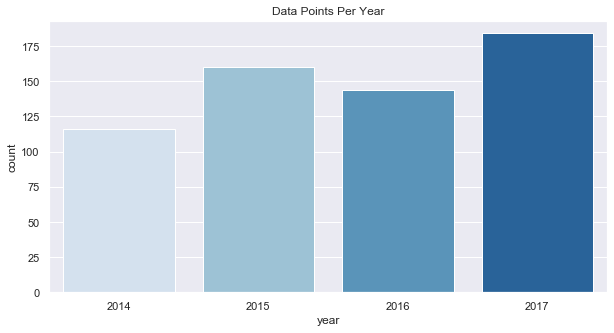

In [140]:
#Data points per year
plt.figure(figsize=(10,5))
sns.countplot(x ='year', data = ht_offenses_4_years_clean, palette = "Blues")
plt.title("Data Points Per Year")

Text(0.5, 1.0, 'Magnitude of Occurences Per Year')

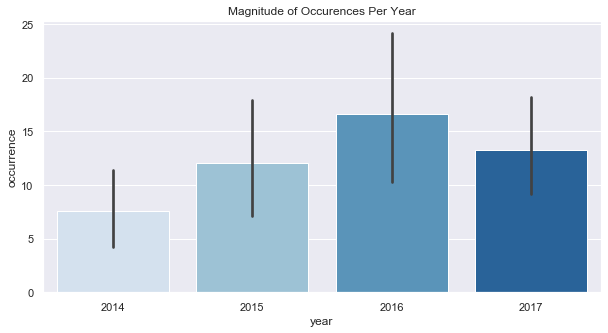

In [141]:
#Occurrences per year
plt.figure(figsize=(10,5))

sns.barplot(x ='year',y='occurrence', data = ht_offenses_4_years_clean, palette = "Blues")
plt.title("Magnitude of Occurences Per Year")

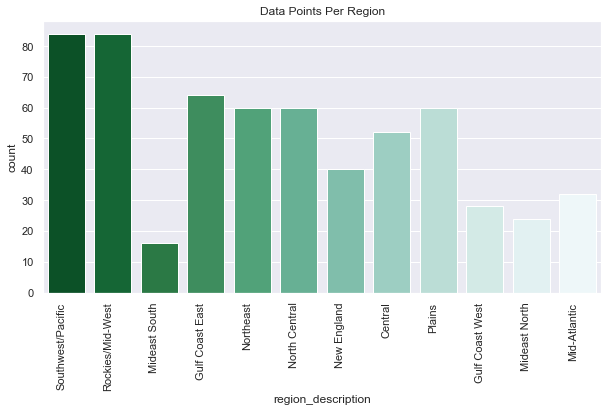

In [142]:
#data points per regions
plt.figure(figsize=(10,5))

g = sns.countplot(x ='region_description', data = ht_offenses_4_years_clean, palette = "BuGn_r")
for label in g.get_xticklabels():
    label.set_rotation(90)
    label.set_ha('right')
    plt.title("Data Points Per Region")

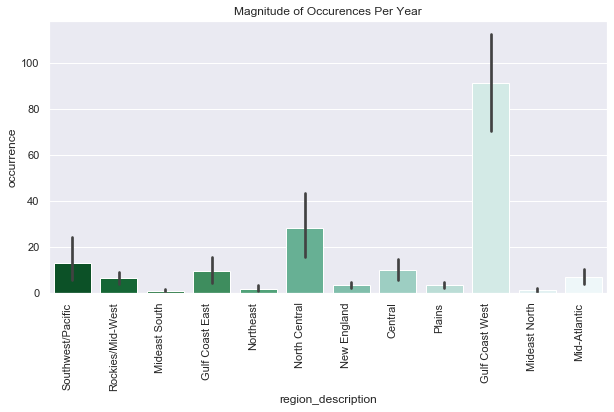

In [143]:
plt.figure(figsize=(10,5))

g=sns.barplot(x ='region_description',y='occurrence', data = ht_offenses_4_years_clean, palette = "BuGn_r")
for label in g.get_xticklabels():
    label.set_rotation(90)
    label.set_ha('right')
    plt.title("Magnitude of Occurences Per Year")

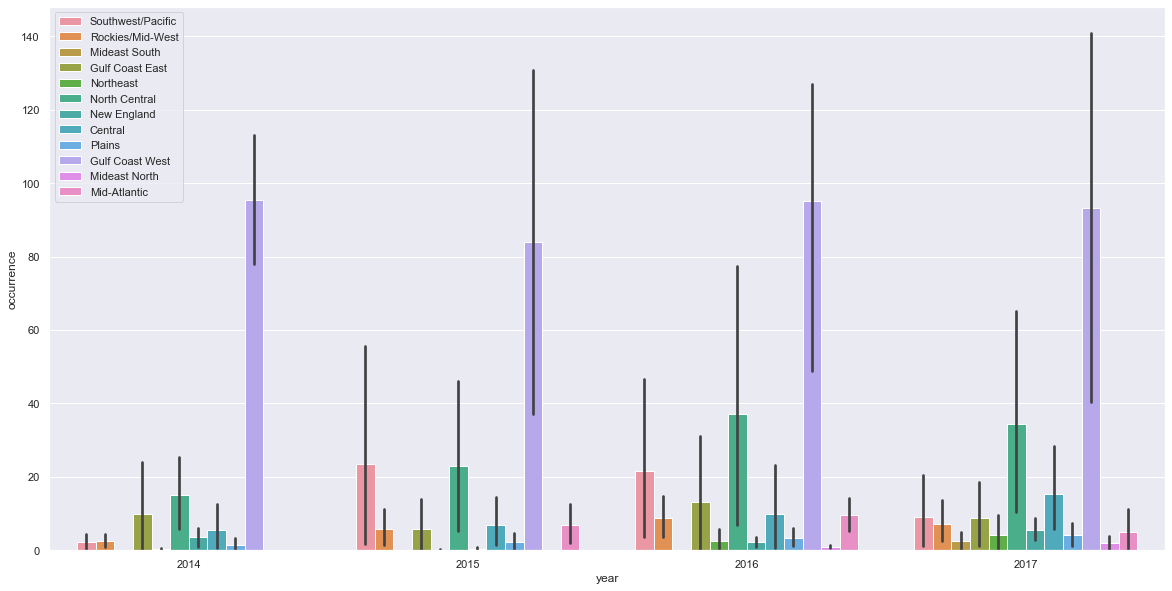

In [162]:
plt.figure(figsize=(20,10))

sns.barplot(data=ht_offenses_4_years_clean, x="year", y="occurrence", hue="region_description")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.legend(loc='upper left')
plt.show()

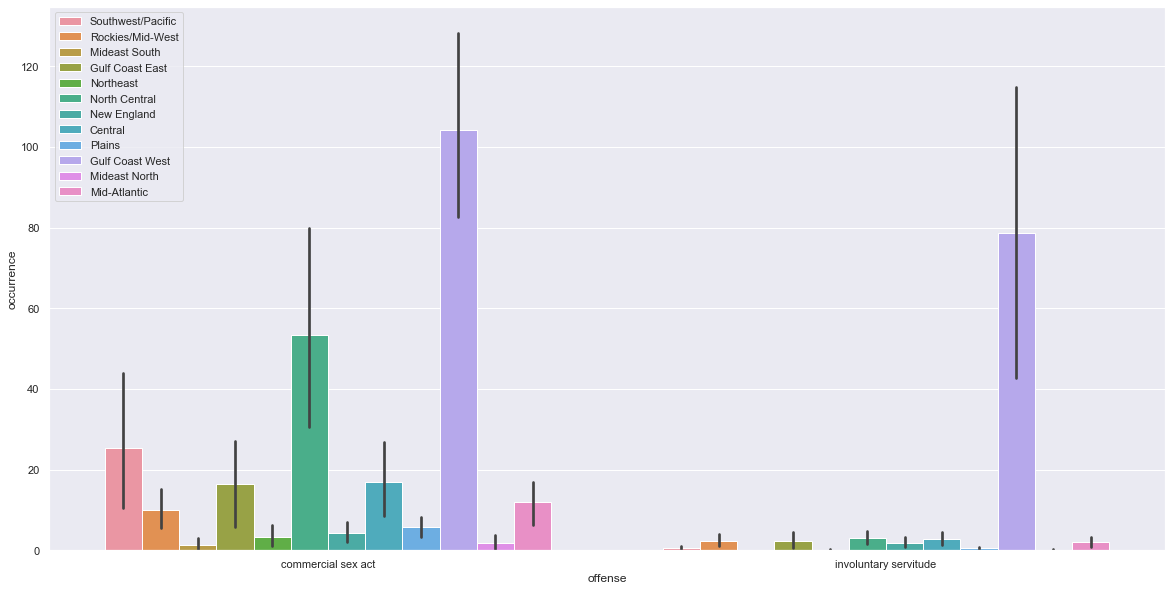

In [161]:


plt.figure(figsize=(20,10))

sns.barplot(data=ht_offenses_4_years_clean, x="offense", y="occurrence", hue="region_description")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)
plt.legend(loc='upper left')
plt.show()

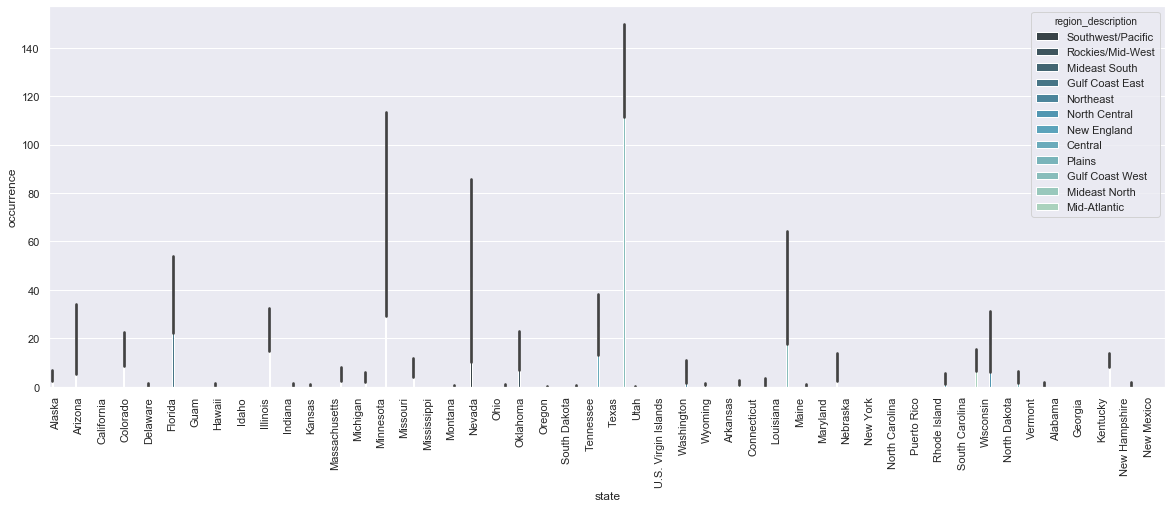

In [145]:
fig= plt.figure(figsize=(20,7))
g = sns.barplot(x ='state', y = 'occurrence', data = ht_offenses_4_years_clean, hue = 'region_description', palette = "GnBu_d")
for label in g.get_xticklabels():
  label.set_rotation(90)
  label.set_ha('right')


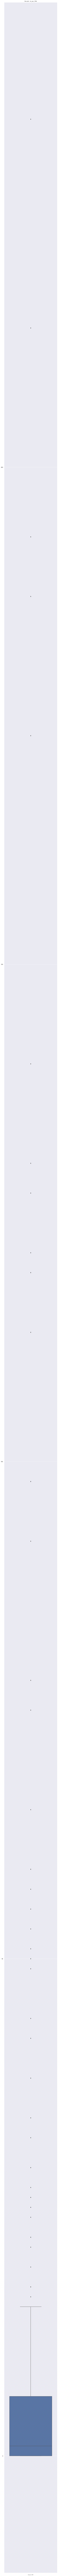

In [168]:
#Outlier detection for each numerical column: Black dots are outliers
col_names = ['occurrence']

fig, ax = plt.subplots(len(col_names), figsize=(8,400))

sns.boxplot(y=ht_offenses_4_years_clean[col_names], ax=ax)
ax.set_title('Box plot - {}'.format(col_val), fontsize=10)
ax.set_xlabel(col_val, fontsize=8)

plt.show()

In [82]:
# #Ways to remove outliers from the data. (Note we wont remove error because limited data for this project.)
# def percentile_based_outlier(data, threshold=95):
#     diff = (100 - threshold) / 2
#     minval, maxval = np.percentile(data, [diff, 100 - diff])
#     return (data < minval) | (data > maxval)

# col_names = ['occurrence']

# fig, ax = plt.subplots(len(col_names), figsize=(8,40))

# x = ht_offenses_4_years_clean[col_val]
# sns.distplot(x, rug=True, hist=False)
# outliers = x[percentile_based_outlier(x)]
# ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

# ax.set_title('Outlier detection - {}'.format(col_val), fontsize=10)
# ax.set_xlabel(col_val, fontsize=8)

# plt.show()

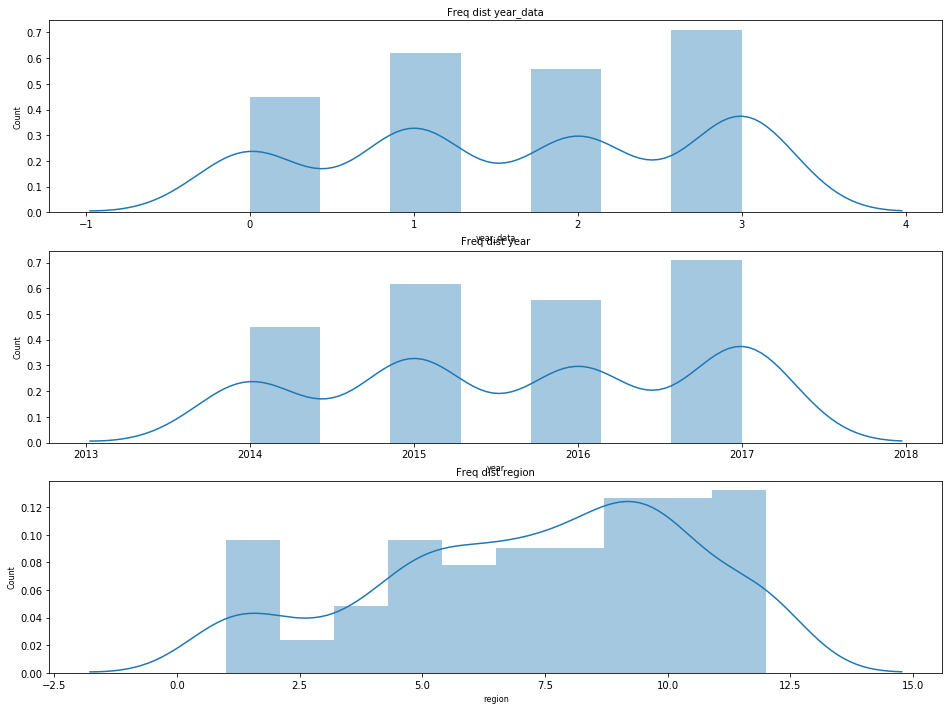

In [83]:
col_names = ['year_data', 'year', 'region']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(ht_offenses_4_years_clean[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

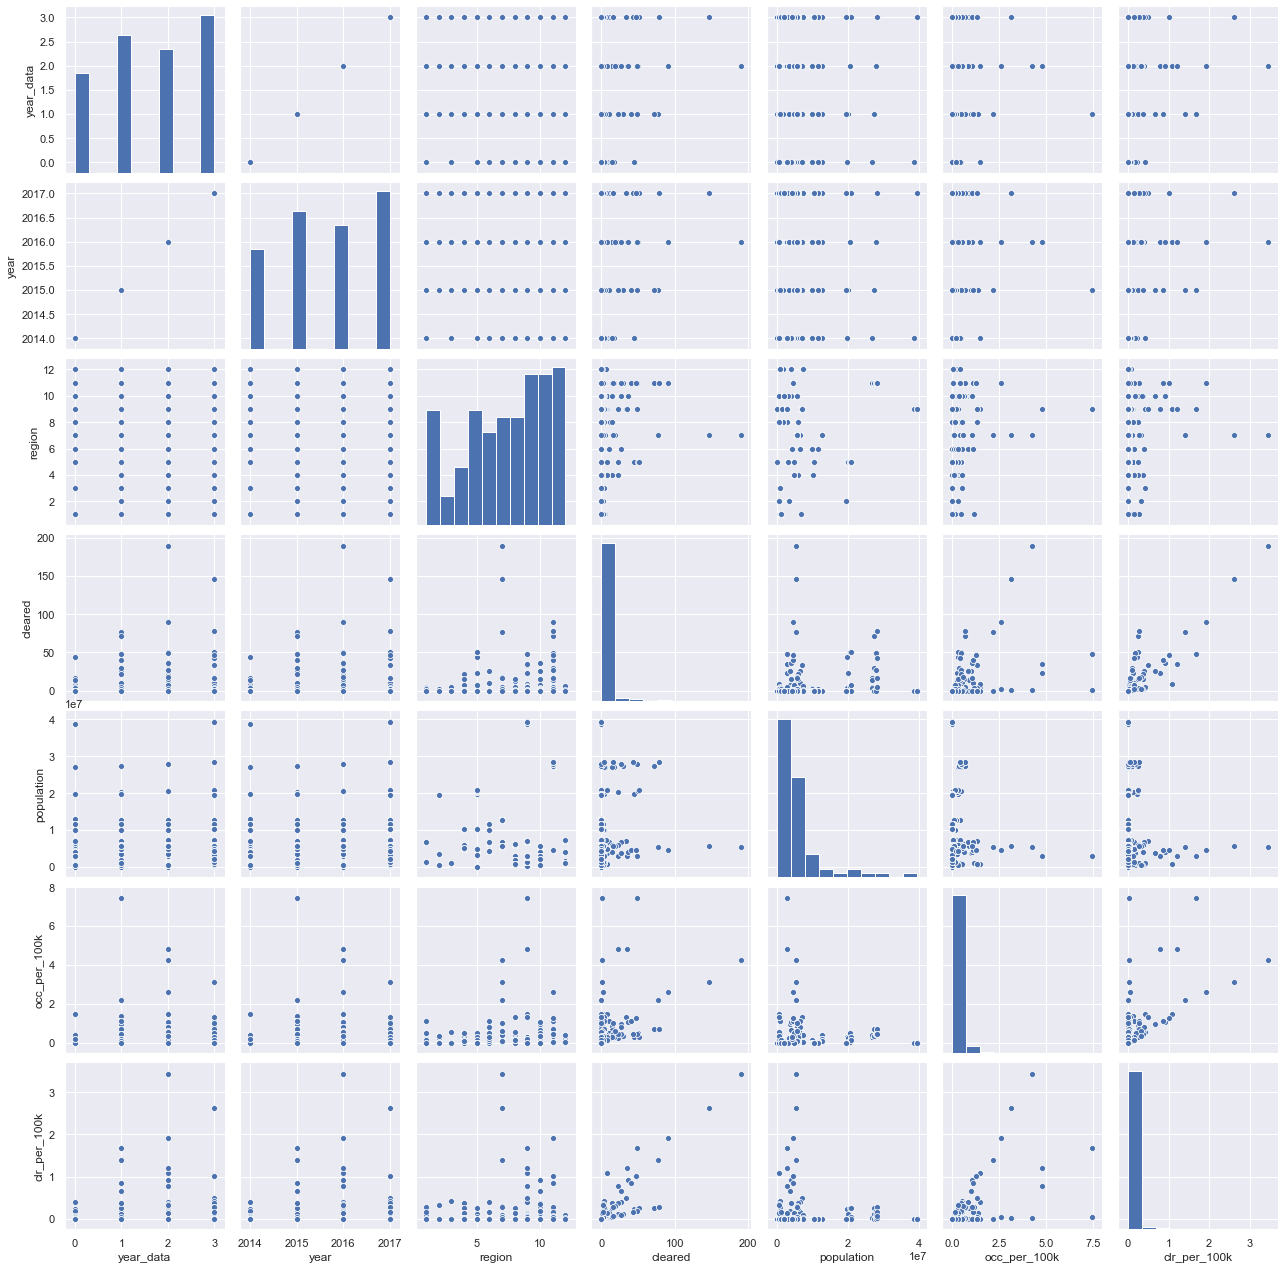

In [170]:
#Pair relationship
data_hist = ht_offenses_4_years_clean.drop(col_names, axis=1)
sns_plot = sns.pairplot(data_hist)
sns_plot.savefig("output.png")

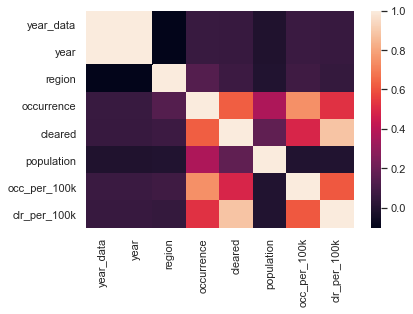

In [172]:
#Corr matrix
sns.heatmap(ht_offenses_4_years_clean.corr())


In [86]:
#get numerical data columns
numerical_columns = [col for col in ht_offenses_4_years_clean.columns if (ht_offenses_4_years_clean[col].dtype=='int64' or ht_offenses_4_years_clean[col].dtype=='float64')]

#Summary Stats for numerical columns
summary_Stats_df = ht_offenses_4_years_clean[numerical_columns].describe()

In [87]:
#drop columns that done really make sense (like years and region)

summary_Stats_df.drop(['year_data','year','region'], axis = 1)

,occurrence,cleared,population,occ_per_100k,clr_per_100k
count,604.000000,604.000000,6.040000e+02,604.000000,604.000000
mean,12.645695,2.822848,6.020346e+06,0.215471,0.048538
std,34.060092,13.311552,6.874310e+06,0.660723,0.239598
min,0.000000,0.000000,1.075100e+05,0.000000,0.000000
25%,0.000000,0.000000,1.424203e+06,0.000000,0.000000
50%,1.000000,0.000000,4.016918e+06,0.009242,0.000000
75%,6.000000,0.000000,6.763652e+06,0.167875,0.000000
max,235.000000,190.000000,3.939935e+07,7.459913,3.439905


In [88]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = ht_offenses_4_years_clean[numerical_columns]
try:
    X = data.iloc[:,0:20]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k=10)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(10,'Score'))  #print 10 best features
except:
    print('k should be >=0, <= n_features = 8; got 10. Use k="all" to return all features.')


k should be >=0, <= n_features = 8; got 10. Use k="all" to return all features.


In [109]:
ht_offenses_4_years_clean

,year_data,year,region,region_description,state,offense,occurrence,age,cleared,population,occ_per_100k,clr_per_100k
0,0,2014,9,Southwest/Pacific,Alaska,commercial sex act,11,adult,3,736307,1.493942,0.407439
1,0,2014,9,Southwest/Pacific,Alaska,commercial sex act,11,juvenile,0,736307,1.493942,0.000000
2,0,2014,9,Southwest/Pacific,Alaska,involuntary servitude,0,adult,0,736307,0.000000,0.000000
3,0,2014,9,Southwest/Pacific,Alaska,involuntary servitude,0,juvenile,0,736307,0.000000,0.000000
4,1,2015,9,Southwest/Pacific,Alaska,commercial sex act,10,adult,1,737547,1.355846,0.135585
...,...,...,...,...,...,...,...,...,...,...,...,...
599,3,2017,1,New England,New Hampshire,involuntary servitude,0,juvenile,0,1349767,0.000000,0.000000
600,3,2017,10,Rockies/Mid-West,New Mexico,commercial sex act,0,adult,0,2093395,0.000000,0.000000
601,3,2017,10,Rockies/Mid-West,New Mexico,commercial sex act,0,juvenile,0,2093395,0.000000,0.000000
602,3,2017,10,Rockies/Mid-West,New Mexico,involuntary servitude,0,adult,0,2093395,0.000000,0.000000
